In [4]:
import pandas as pd

### Importing the data

In [6]:
df = pd.read_csv("Diabetes Missing Data.csv")
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [8]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Checking dataframe info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Missing value in columns

In [14]:
df.isna().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

### Mean of missing value

In [17]:
df.isna().mean()

Pregnant             0.000000
Glucose              0.006510
Diastolic_BP         0.045573
Skin_Fold            0.295573
Serum_Insulin        0.486979
BMI                  0.014323
Diabetes_Pedigree    0.000000
Age                  0.000000
Class                0.000000
dtype: float64

### Finding out colunbs where mean is greater than zero

In [20]:
df.columns[df.isna().mean()>0]

Index(['Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI'], dtype='object')

### Fraction value of Target variable 

In [23]:
df['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

In [25]:
df['Class'].value_counts()/df.shape[0]

Class
0    0.651042
1    0.348958
Name: count, dtype: float64

### Handing Missing Values

In [28]:
cols_to_remove = df.columns[df.isna().mean()>0.3]
cols_to_remove

Index(['Serum_Insulin'], dtype='object')

In [30]:
new_df = df.drop(cols_to_remove,axis=1)
new_df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,30.1,0.349,47,1


In [32]:
new_df.isna().mean()

Pregnant             0.000000
Glucose              0.006510
Diastolic_BP         0.045573
Skin_Fold            0.295573
BMI                  0.014323
Diabetes_Pedigree    0.000000
Age                  0.000000
Class                0.000000
dtype: float64

### Import SimplelImputer to filling values with NAN values

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy='mean')
imputed_arr = imputer.fit_transform(new_df)

In [39]:
type(imputed_arr)

numpy.ndarray

In [41]:
new_df = pd.DataFrame(imputed_arr,columns=new_df.columns)

In [43]:
new_df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.00000,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,43.1,2.288,33.0,1.0


In [45]:
new_df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
new_df.isna().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

In [49]:
new_df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
df.isna().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [53]:
df = new_df

In [55]:
df.isna().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

### Visualization

In [58]:
import seaborn as sns

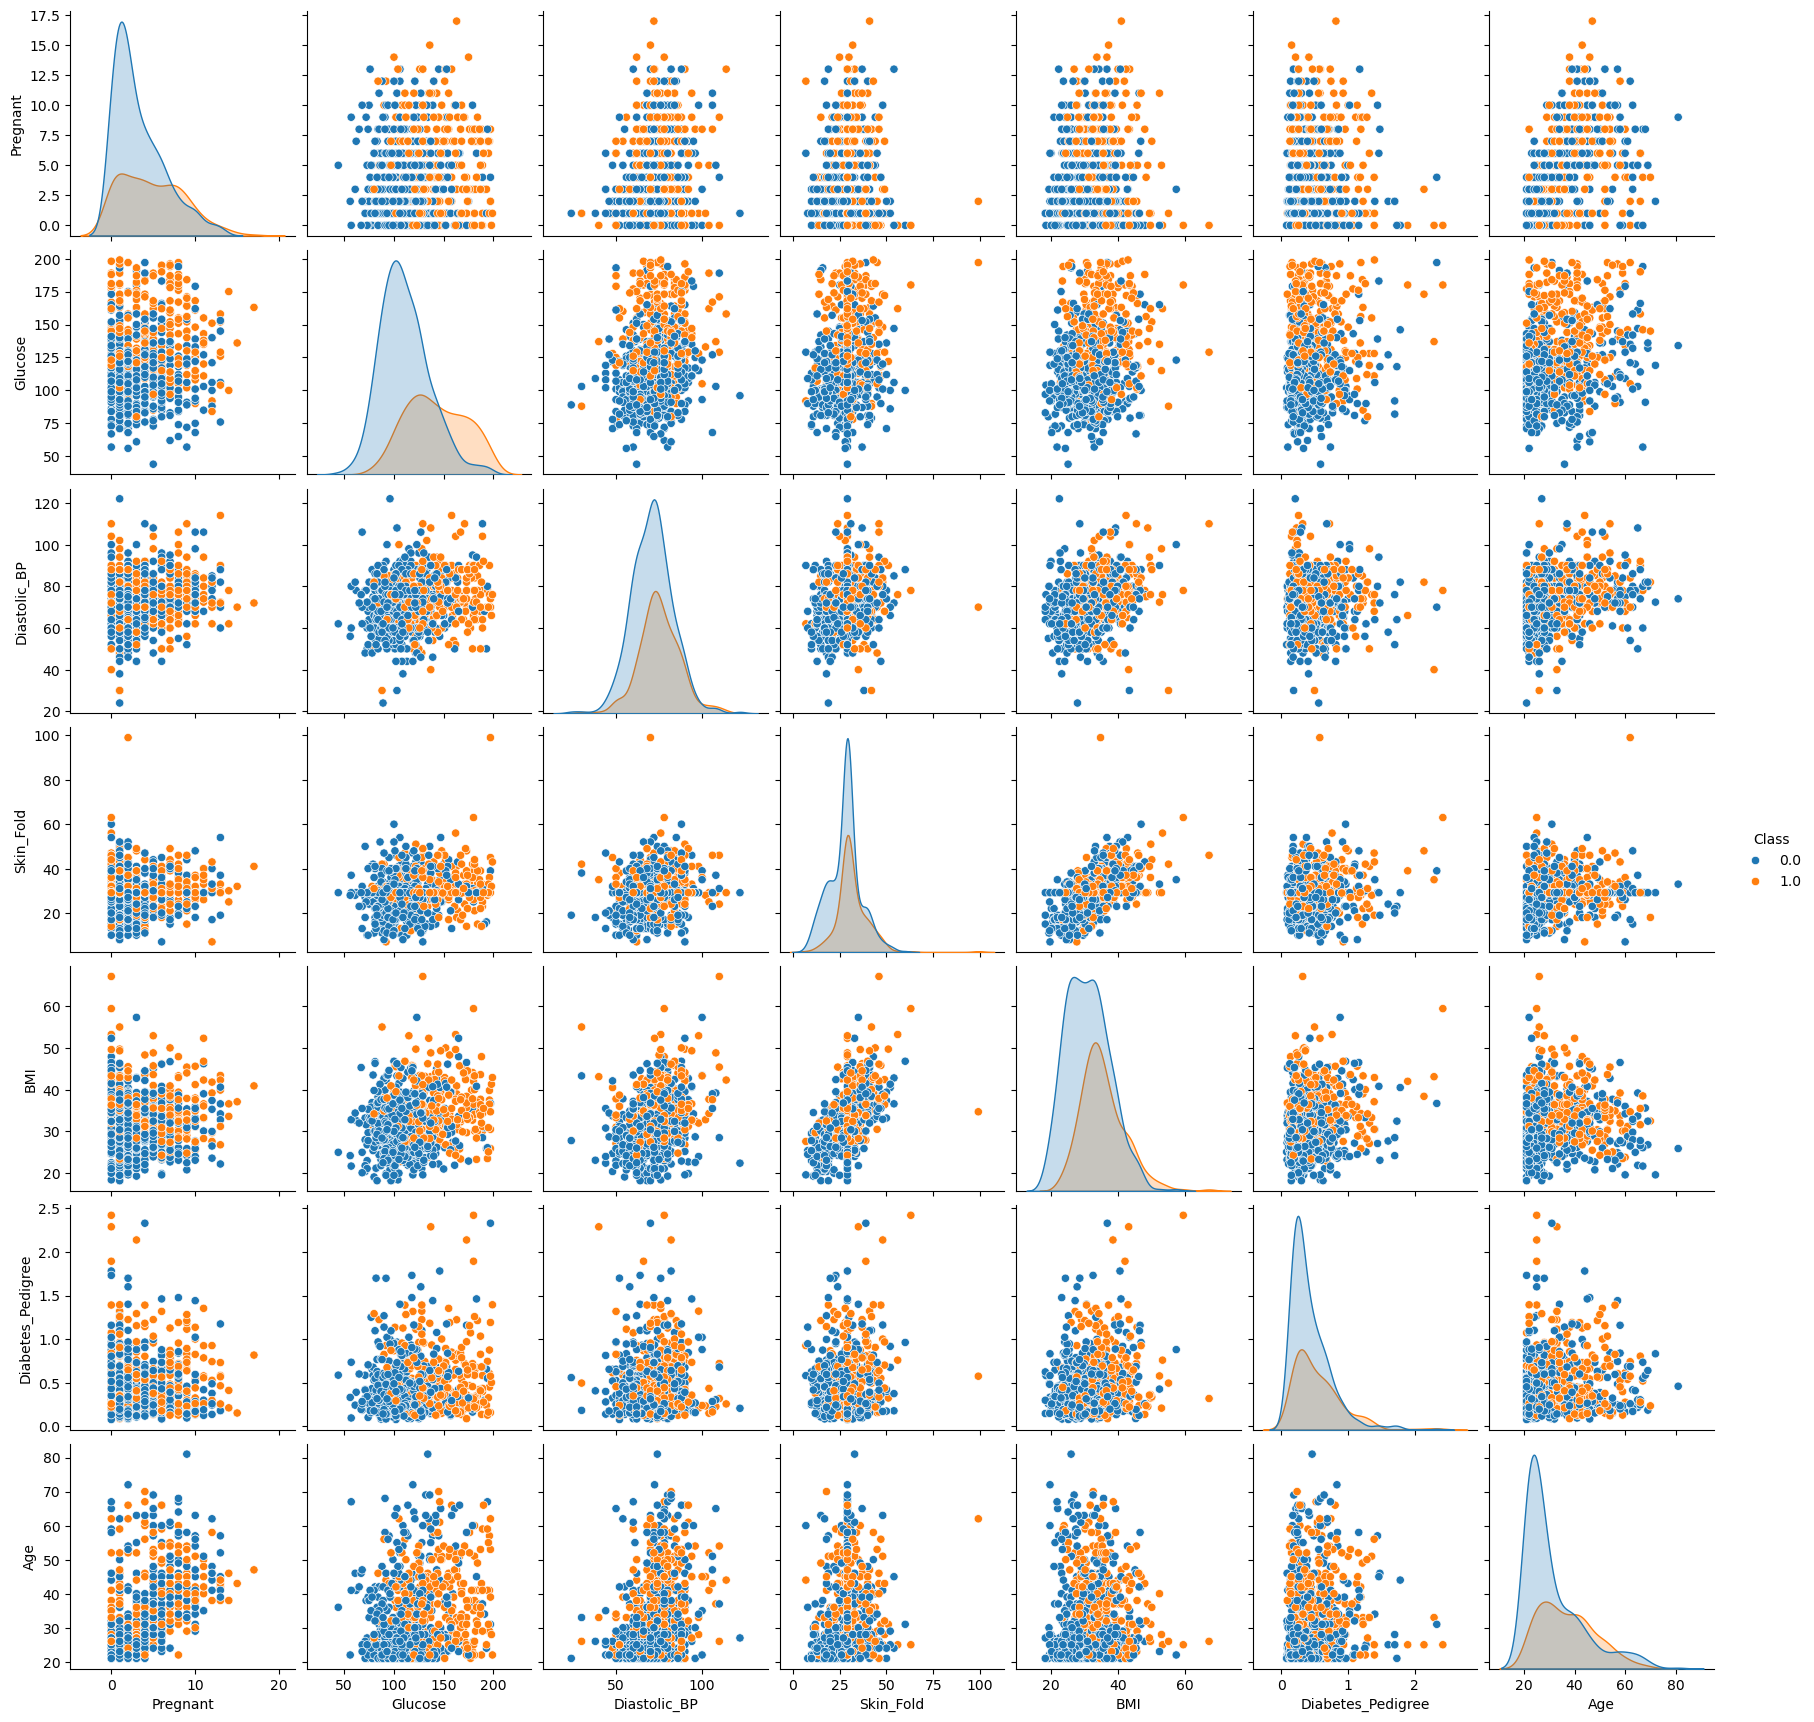

In [59]:
sns.pairplot(df,hue = 'Class')

<Axes: xlabel='Class', ylabel='Glucose'>

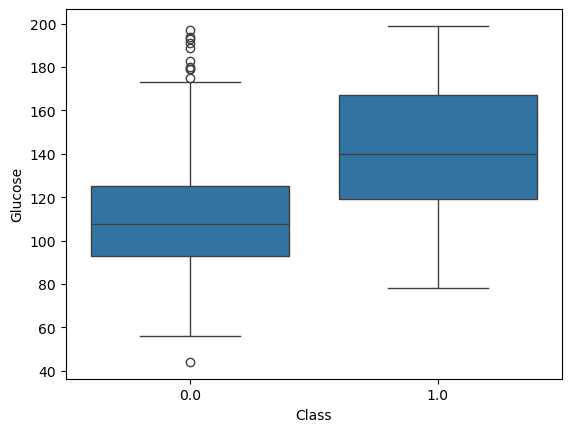

In [60]:
sns.boxplot(data=df, x='Class', y='Glucose')

C:\Users\HP\AppData\Local\Temp\ipykernel_9796\1046240786.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Class', y ='Glucose',palette='Set3')


<Axes: xlabel='Class', ylabel='Glucose'>

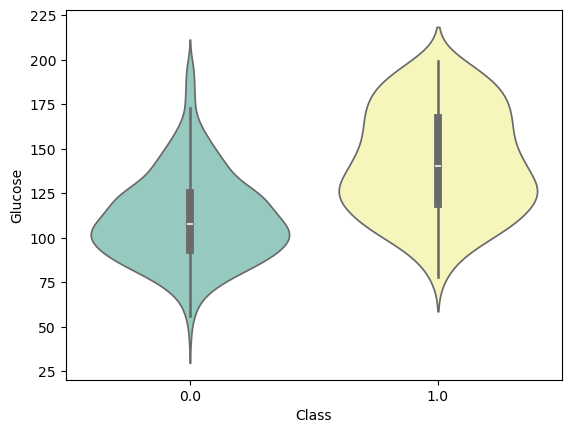

In [61]:
sns.violinplot(data=df, x='Class', y ='Glucose',palette='Set3')

### Model Building

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df.drop('Class',axis=1)

In [66]:
y = df['Class']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=30)

In [68]:
y_train.value_counts()/y_train.shape[0]

Class
0.0    0.635009
1.0    0.364991
Name: count, dtype: float64

In [69]:
y_test.value_counts()/y_test.shape[0]

Class
0.0    0.688312
1.0    0.311688
Name: count, dtype: float64

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model_rf = RandomForestClassifier(n_estimators=300, max_depth=3,random_state=30)

In [72]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=30)

In [73]:
y_pred_rf_train = model_rf.predict(X_train)
y_pred_rf_test = model_rf.predict(X_test)

### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
model_lr = LogisticRegression(random_state=30)

In [93]:
model_lr.fit(X_train,y_train)

LogisticRegression(random_state=30)

In [95]:
y_pred_lr_train = model_lr.predict(X_train)
y_pred_lr_test = model_lr.predict(X_test)

### Finding the accuracy of model

In [98]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [102]:
def evaluation_preds(y_true,y_pred):
    print(accuracy_score(y_true,y_pred))
    print(classification_report(y_true,y_pred))

In [120]:
print("Train Evaluation for Random Forest")
evaluation_preds(y_train,y_pred_rf_train)
print('\n\nTest Evaluation for Random Forest')
evaluation_preds(y_test,y_pred_rf_test)

Train Evaluation for Random Forest
0.7858472998137802
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84       341
         1.0       0.78      0.58      0.66       196

    accuracy                           0.79       537
   macro avg       0.78      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537



Test Evaluation for Random Forest
0.7792207792207793
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       159
         1.0       0.68      0.56      0.61        72

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



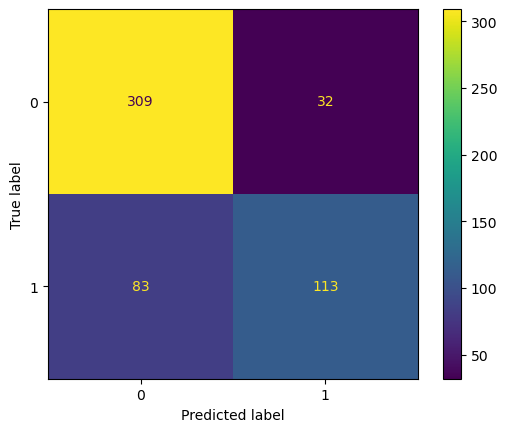

In [116]:
cm = confusion_matrix(y_train,y_pred_rf_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

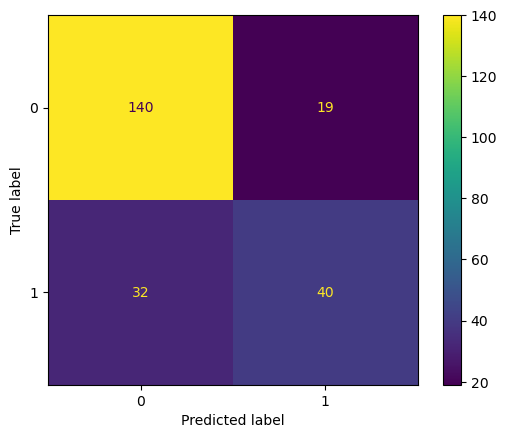

In [118]:
cm1 = confusion_matrix(y_test,y_pred_rf_test)
ConfusionMatrixDisplay(confusion_matrix=cm1).plot()

In [122]:
print("Train Evaluation for Logistic Regression")
evaluation_preds(y_train,y_pred_lr_train)
print('\n\nTest Evaluation for Logistic Regression')
evaluation_preds(y_test,y_pred_lr_test)

Train Evaluation for Logistic Regression
0.7653631284916201
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.83       341
         1.0       0.72      0.58      0.64       196

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.73       537
weighted avg       0.76      0.77      0.76       537



Test Evaluation for Logistic Regression
0.7792207792207793
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       159
         1.0       0.66      0.61      0.63        72

    accuracy                           0.78       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.78      0.78      0.78       231



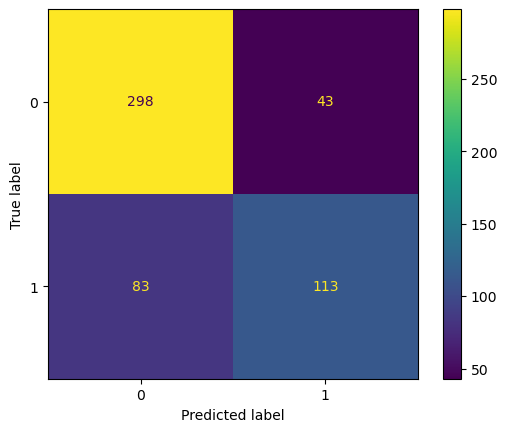

In [126]:
cm2 = confusion_matrix(y_train,y_pred_lr_train)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot()

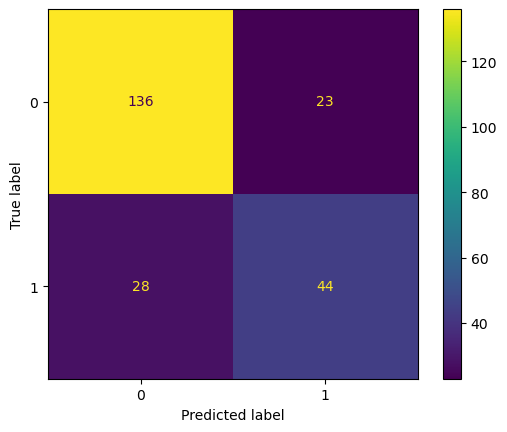

In [128]:
cm3 = confusion_matrix(y_test,y_pred_lr_test)
ConfusionMatrixDisplay(confusion_matrix=cm3).plot()

### GridSearch CV for Random Forest Classifier

In [161]:
from sklearn.model_selection import GridSearchCV
dt = RandomForestClassifier(random_state=30)
params= {'max_depth':[2,3,4,5,6,7],
         'n_estimators':[80,100,200,300,400]}
gsearch = GridSearchCV(dt,param_grid=params,cv=3)
gsearch.fit(X_train,y_train)
gsearch.best_params_

{'max_depth': 3, 'n_estimators': 300}

### Observation

- Random forest Classifier is more reliable then logistic regression
- As comperd this two model we can concluded that both model are little bit overfit.